In [1]:
#import necessary library

import pandas as pd
import numpy as np
import random as rnd     

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

from sklearn.preprocessing import StandardScaler
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer
from sklearn.pipeline import FeatureUnion,make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

In [2]:
#read the dataset through head method

data = pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
data.head()


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
data.shape

(907, 27)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
data.primary_fuel.unique() #WE can see that it is a classification model.


array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [7]:
data.country_long.unique() #WE can see that it is a classification model.


array(['India'], dtype=object)

WE WILL FIRST MAKE PREDICTION BASED ON capacity_mw 

In [8]:
data.isna().sum() #we can see that there are nulls so we have to proceed further.

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [9]:
data.drop(['other_fuel3'],axis=1,inplace=True)
data.drop(['wepp_id'],axis=1,inplace=True)
data.drop(['generation_gwh_2019'],axis=1,inplace=True)
data.drop(['estimated_generation_gwh'],axis=1,inplace=True)
data.drop(['name'],axis=1,inplace=True)
data.drop(['country_long'],axis=1,inplace=True)
data.drop(['geolocation_source'],axis=1,inplace=True)
data.drop(['generation_gwh_2014'],axis=1,inplace=True)
data.drop(['generation_gwh_2015'],axis=1,inplace=True)
data.drop(['generation_gwh_2018'],axis=1,inplace=True)
data.drop(['generation_gwh_2016'],axis=1,inplace=True)
data.drop(['generation_gwh_2017'],axis=1,inplace=True)



In [10]:
data.drop(['generation_gwh_2013'],axis=1,inplace=True)


In [11]:
data.head()

,country,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,year_of_capacity_data,generation_data_source
0,IND,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,NaN,NaN
1,IND,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,NaN,NaN
2,IND,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,NaN,NaN
3,IND,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,2019.0,Central Electricity Authority
4,IND,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,2019.0,Central Electricity Authority


In [12]:
#we can drop few features which will not contribute for prediction

data.drop(['latitude'],axis=1,inplace=True) #not focusing on the geographical aspect so we can drop
data.drop(['longitude'],axis=1,inplace=True) #not focusing on the geographical aspect so we can drop
data.drop(['gppd_idnr'],axis=1,inplace=True) # it has diffrent identities we can drop it
data.drop(['url'],axis=1,inplace=True) #url may not be contributing anything to fuel
data.drop(['source'],axis=1,inplace=True)
data.drop(['owner'],axis=1,inplace=True)#The owner column might not be directly related to the primary.
data.drop(['country'],axis=1,inplace=True) #countrylong and country both are same we can drop one 
data.drop(['primary_fuel'],axis=1,inplace=True) #countrylong and country both are same we can drop one 
data.drop(['generation_data_source'],axis=1,inplace=True) #countrylong and country both are same we can drop one 



In [13]:
data.shape

(907, 5)

In [14]:
data.isna().sum() #we can see that there are nulls so we have to proceed further.

capacity_mw                0
other_fuel1              709
other_fuel2              906
commissioning_year       380
year_of_capacity_data    388
dtype: int64

In [15]:
categorical_columns = data.select_dtypes(include=['object']).columns


In [16]:
categorical_columns

Index(['other_fuel1', 'other_fuel2'], dtype='object')

In [18]:
#filling nulls
data.other_fuel1 = data.other_fuel1.fillna('none')
data.other_fuel2 = data.other_fuel2.fillna('none')


In [19]:
numerical_column = data.select_dtypes(include=['float64']).columns
numerical_column


Index(['capacity_mw', 'commissioning_year', 'year_of_capacity_data'], dtype='object')

In [20]:
#imputing the null values using imputer

imp = SimpleImputer(strategy='mean')
data['commissioning_year'] = imp.fit_transform(data['commissioning_year'].values.reshape(-1, 1) )
data['year_of_capacity_data'] = imp.fit_transform(data['year_of_capacity_data'].values.reshape(-1, 1) )
data['generation_gwh_2014'] = imp.fit_transform(data['generation_gwh_2014'].values.reshape(-1, 1) )
data['generation_gwh_2015'] = imp.fit_transform(data['generation_gwh_2015'].values.reshape(-1, 1) )
data['generation_gwh_2016'] = imp.fit_transform(data['generation_gwh_2016'].values.reshape(-1, 1) )
data['generation_gwh_2017'] = imp.fit_transform(data['generation_gwh_2017'].values.reshape(-1, 1) )
data['generation_gwh_2018'] = imp.fit_transform(data['generation_gwh_2018'].values.reshape(-1, 1) )



KeyError: 'generation_gwh_2014'

In [ ]:
data.isna().sum() #we can see that there are no nulls we have to successfully treated the nulls.

In [107]:
data.head()

,capacity_mw,other_fuel1,other_fuel2,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,none,none,2011.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,none
1,98.0,none,none,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,none
2,39.2,none,none,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,none
3,135.0,none,none,2004.000000,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,Oil,none,2015.000000,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [22]:
#generating dummy values on the data dataset
data= pd.get_dummies(data).astype(int)
data.head()


,capacity_mw,commissioning_year,year_of_capacity_data,other_fuel1_Cogeneration,other_fuel1_Gas,other_fuel1_Oil,other_fuel1_none,other_fuel2_Oil,other_fuel2_none
0,2,2011,2019,0,0,0,1,0,1
1,98,1997,2019,0,0,0,1,0,1
2,39,1997,2019,0,0,0,1,0,1
3,135,2004,2019,0,0,0,1,0,1
4,1800,2015,2019,0,0,1,0,0,1


In [23]:
data.head()

,capacity_mw,commissioning_year,year_of_capacity_data,other_fuel1_Cogeneration,other_fuel1_Gas,other_fuel1_Oil,other_fuel1_none,other_fuel2_Oil,other_fuel2_none
0,2,2011,2019,0,0,0,1,0,1
1,98,1997,2019,0,0,0,1,0,1
2,39,1997,2019,0,0,0,1,0,1
3,135,2004,2019,0,0,0,1,0,1
4,1800,2015,2019,0,0,1,0,0,1


In [24]:
data.shape

(907, 9)

In [25]:
data.columns

Index(['capacity_mw', 'commissioning_year', 'year_of_capacity_data',
       'other_fuel1_Cogeneration', 'other_fuel1_Gas', 'other_fuel1_Oil',
       'other_fuel1_none', 'other_fuel2_Oil', 'other_fuel2_none'],
      dtype='object')

In [26]:
data.shape

(907, 9)

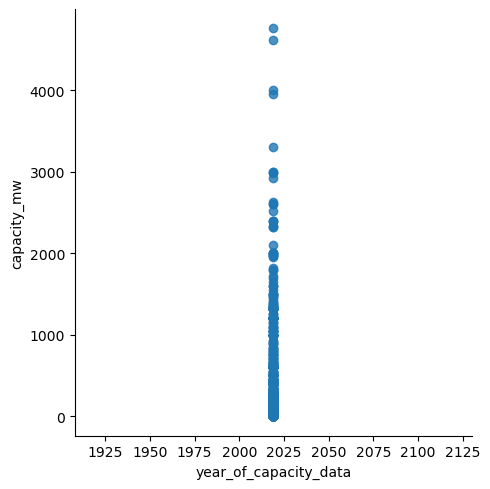

In [27]:
sns.lmplot(x='year_of_capacity_data',y='capacity_mw',data=data,palette='colorblind')


In [28]:
data.skew()

capacity_mw                  3.123272
commissioning_year          -1.390520
year_of_capacity_data        0.000000
other_fuel1_Cogeneration    30.116441
other_fuel1_Gas             21.260214
other_fuel1_Oil              1.389800
other_fuel1_none            -1.366106
other_fuel2_Oil             30.116441
other_fuel2_none           -30.116441
dtype: float64

In [29]:
#we will reduce the skewness through cube root method

data['other_fuel1_Gas']=np.cbrt(data['other_fuel1_Gas'])
data['other_fuel1_Cogeneration']=np.cbrt(data['other_fuel1_Cogeneration'])
data['other_fuel2_Oil']=np.cbrt(data['other_fuel2_Oil'])


In [30]:
data.skew()

capacity_mw                  3.123272
commissioning_year          -1.390520
year_of_capacity_data        0.000000
other_fuel1_Cogeneration    30.116441
other_fuel1_Gas             21.260214
other_fuel1_Oil              1.389800
other_fuel1_none            -1.366106
other_fuel2_Oil             30.116441
other_fuel2_none           -30.116441
dtype: float64

In [31]:
y = data['capacity_mw']
x = data.drop(columns = ['capacity_mw'])

In [32]:
#scaling the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x) # We are able to tackle the issue of biasness through standard scalar method


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesClassifier


In [34]:
#training the model

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size = 0.30, random_state = 40)


In [35]:
regression = LinearRegression()
regression.fit(x_train, y_train)


LinearRegression()

In [36]:
regression.score(x_train,y_train) #here is the score of train data

0.42050574900607995

In [37]:
regression.score(x_test,y_test) #here is the score of test data

-5.735907714318091e+22

In [38]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_val_score


In [39]:
pred_LR = regression.predict(x_test)
pred_train=regression.predict(x_train)
print("r2_score:" , r2_score(y_test,pred_LR))
print("r2_score on training data:" ,r2_score(y_train,pred_train)*100 )
print("Mean absolute error:" ,mean_absolute_error(y_test, pred_LR))
print("Mean squared erroe:" ,mean_squared_error(y_test, pred_LR))
print("Root mean squared error:" ,np.sqrt(mean_squared_error(y_test, pred_LR)))


r2_score: -5.735907714318091e+22
r2_score on training data: 42.050574900608
Mean absolute error: 9695225197767.654
Mean squared erroe: 2.5661287914965805e+28
Root mean squared error: 160191410240892.16


In [40]:
import joblib
joblib.dump(regression, 'power_plant.pkl')


['power_plant.pkl']

In [41]:
RFC = joblib.load('Avocado.pkl')

prediction = regression.predict(x_test)  
prediction


array([ 6.24013672e+01,  1.01097949e+03,  1.01604199e+03,  1.02622949e+03,
        1.21073242e+02,  1.15979492e+02,  1.49151367e+02,  8.02607422e+01,
        1.28729492e+02,  9.49729492e+02,  2.36831055e+02,  1.28729492e+02,
        1.41495117e+02,  1.28729492e+02,  1.02116699e+03,  1.28729492e+02,
        4.96357422e+01,  9.82854492e+02,  1.28729492e+02,  1.74666992e+02,
        1.00329199e+03,  1.01347949e+03,  1.28729492e+02,  1.10870117e+02,
        1.31291992e+02,  2.15732422e+01,  9.75229492e+02,  9.98166992e+02,
        9.04638672e+01,  1.03213867e+02,  1.28729492e+02,  1.18526367e+02,
        1.28729492e+02,  1.28729492e+02,  1.23635742e+02,  5.72919922e+01,
        1.31291992e+02,  9.67604492e+02,  1.02372949e+03,  1.28729492e+02,
        1.28729492e+02,  9.90541992e+02,  1.69557617e+02,  1.01604199e+03,
        1.28729492e+02,  1.72104492e+02,  1.28729492e+02,  1.28729492e+02,
        1.01860449e+03,  1.02622949e+03,  1.00841699e+03,  1.28729492e+02,
        1.28729492e+02,  

In [42]:
a = np.array(y_test)
data = pd.DataFrame()
data['Predicted']=prediction
data['Actual']=a
data


,Predicted,Actual
0,62.401367,36
1,1010.979492,540
2,1016.041992,1320
3,1026.229492,1980
4,121.073242,15
...,...,...
268,34.338867,161
269,1018.604492,3960
270,128.729492,46
271,95.573242,12
